# Chapter 3.4: How do you cross validate detection rates?

LA and Maricopa's detection rate estimated cases vs death rate estimated cases confirmed the two metrics, but, a more honest test of accuracy would pull death and case counts from a different county all together. Choosing a conservative 20% average detection rate, I compared both estimates in Cook IL, Harrison TX, and Miami-Dade FL. If the estimations based on case count / detection rate, and death count / death rate, were reasonably similar, then I can assume that both metrics yield fairly accurate estimations of COVID infections in these counties.

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

cases_df = clean_cases(cases_df)

cases_df_CK = cases_df.iloc[610,:]
cases_df_CK = cases_df_CK.reset_index()
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()

index_val = len(deaths_df_CK.index)

calculate_infection(deaths_df_CK, index_val)

deaths_df_CK = deaths_df_CK[0:-18]
cases_df_CK['detection_cases'] = cases_df_CK[610] / 0.2
cases_df_CK = cases_df_CK[0:-18]

# Cook 

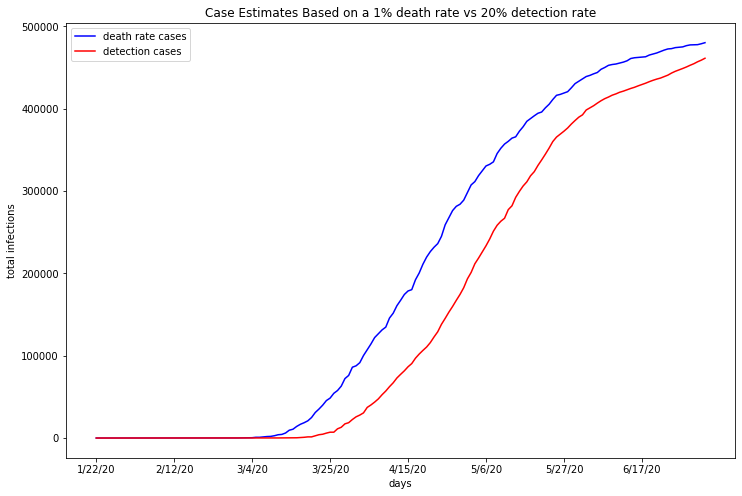

In [3]:
detection_plot(deaths_df_CK, cases_df_CK)

First, this graph is very compelling evidence towards validating both death rate and detection rate metrics. Both infection estimates within Cook county follow nearly parallel trajectorys, with detection rate based estimates about 2 weeks behind the death rate. As aformentioned, case counts have a high likely hood of being inaccurate and low. Cook county may also be delayed in logging cases, due to the influx of Corona patients, their health care may have been overwhelmed. Whichever estimate you examine, however, Cook county appears to have slowed their case rate down damatically and is approaching approximately half a million infections. With a population of over five million people, if Cook caps their total cases at 500,000, they will have managed to only infect 1/10 of their population with COVID 19. 

In [4]:
cases_df_HR = cases_df.iloc[362,:]
cases_df_HR = cases_df_HR.reset_index()
deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()

index_val = len(deaths_df_HR.index)

calculate_infection(deaths_df_HR, index_val)

deaths_df_HR = deaths_df_HR[0:-18]
cases_df_HR['detection_cases'] = cases_df_HR[362] / 0.2
cases_df_HR = cases_df_HR[0:-18]

# Miami-Dade

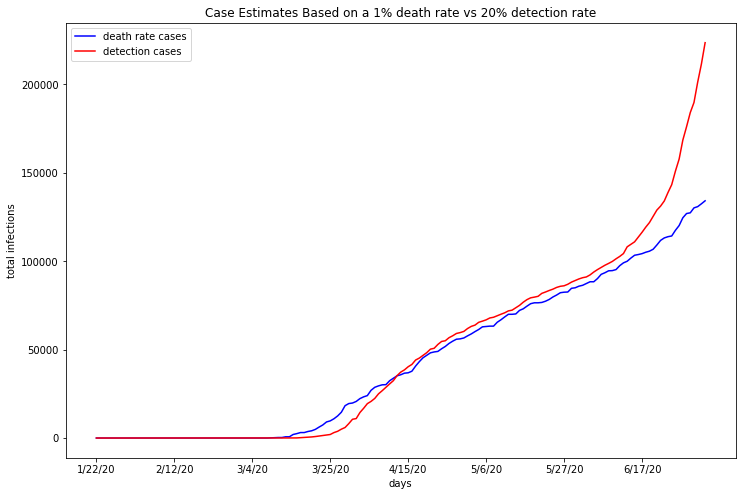

In [5]:
detection_plot(deaths_df_HR, cases_df_HR)

The similar curves of Miami-Dade's infection estimates make this a highly compelling graph that could validate both estimates and the metrics used. Both estimates show an initial spike that nearly flattens, and then rises again exponentially around mid June. After looking into Miami-Dade's important dates involving COVID 19 policy, I found that in early June the county of Miami-Dade opened all entertainment venues, bars, city dog parks, gyms and fitness centers, and a limited number of beaches and pools. Such a wide scale reopening could explain the spike in infections two weeks later. 
Unlike Cook county, the detection rate based estimate surpasses death rate estimates in early April, rising substantially higher in the most recent estimates. This may be due to more wide spread COVID 19 testing, or even poor accuracy in death reporting. 

In [6]:
cases_df_RS = cases_df.iloc[218,:]
cases_df_RS = cases_df_RS.reset_index()
deaths_df_RS = deaths_df.iloc[218,:]
deaths_df_RS = deaths_df_RS.reset_index()

index_val = len(deaths_df_RS.index)

calculate_infection(deaths_df_RS, index_val)

deaths_df_RS = deaths_df_RS[0:-18]
cases_df_RS['detection_cases'] = cases_df_RS[218] / 0.2
cases_df_RS = cases_df_RS[0:-18]

# Riverside

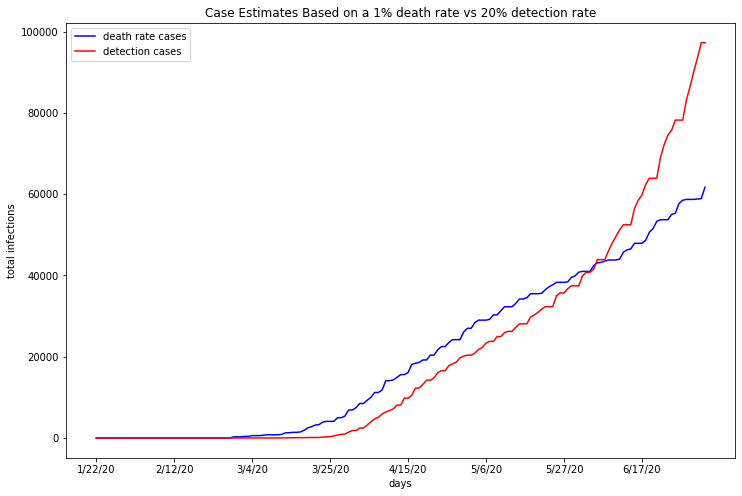

In [7]:
detection_plot(deaths_df_RS, cases_df_RS)

Like Cook county, Riverside's death rate based estimates are about 2 weeks behind detection rate based estimates. And like Maricopa county, those estimates cross over eachother around early June, where the death rate estimate rises exponentially while detection rate continues linearly. As stated previously, any infection estimate based on a the confirmed case count is subject to the inaccuracies intrinsic to the nature of case count reports. Moving forward, as more tests become available, this metric will approach the true number of infections. Early estimates that involve confirmed cases, however, are likely to be lower than the true count.  

As you can see, the plots of both infection estimates for Cook, Miami-Dade, and Riverside follow similar curves and trajectorys. While detection rate is calculated using death rate, each metric was applied to an independant variable and still yielded remarkable similar graphs. This sort of 'cross-referencing' of metrics confirms both methods as a means of estimated true infection counts. 